Epoch 1/20
810/810 [==============================] - 3s 2ms/step - loss: 0.7053 - accuracy: 0.8111
Epoch 2/20
810/810 [==============================] - 2s 2ms/step - loss: 0.2079 - accuracy: 0.9253
Epoch 3/20
810/810 [==============================] - 2s 2ms/step - loss: 0.1929 - accuracy: 0.9290
Epoch 4/20
810/810 [==============================] - 2s 2ms/step - loss: 0.1853 - accuracy: 0.9296
Epoch 5/20
810/810 [==============================] - 2s 2ms/step - loss: 0.1840 - accuracy: 0.9301
Epoch 6/20
810/810 [==============================] - 3s 3ms/step - loss: 0.1792 - accuracy: 0.9307
Epoch 7/20
810/810 [==============================] - 3s 3ms/step - loss: 0.1773 - accuracy: 0.9332
Epoch 8/20
810/810 [==============================] - 2s 2ms/step - loss: 0.1770 - accuracy: 0.9315
Epoch 9/20
810/810 [==============================] - 2s 2ms/step - loss: 0.1746 - accuracy: 0.9336
Epoch 10/20
810/810 [==============================] - 2s 2ms/step - loss: 0.1758 - accuracy: 0.9325

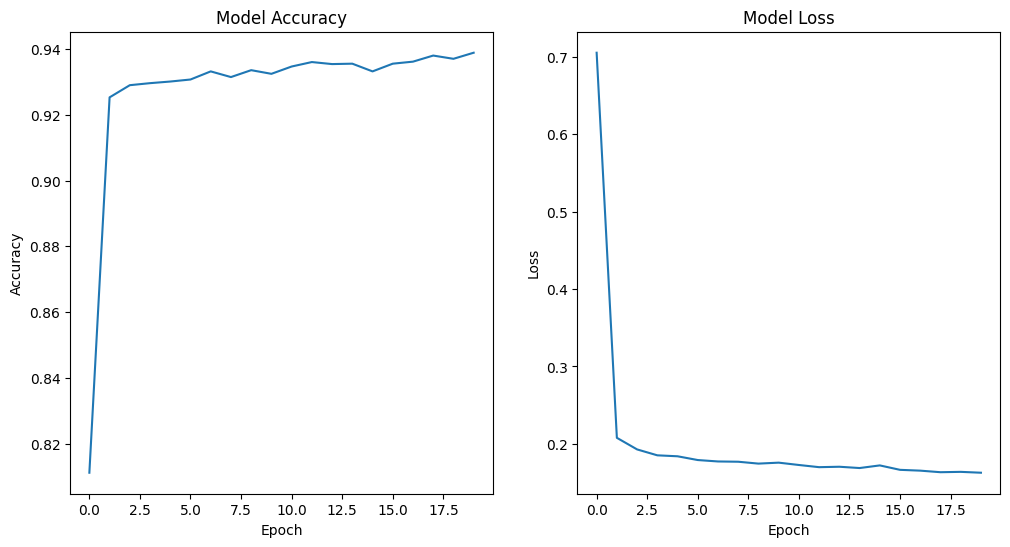

Please provide the following information:


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing
df = pd.read_csv("airlines_reviews1.csv")

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Handling missing values
df.fillna(df.mean(), inplace=True)

# Splitting the dataset into features and labels
X = df.drop(['Recommended', 'Name', 'Airline'], axis=1)  # Features
y = df['Recommended']  # Labels

# Step 2: Neural Network Architecture
model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 3: Training the Model
history = model.fit(X, y, epochs=20, batch_size=10)

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

# Step 4: User Input and Prediction
def predict_recommendation():
    # Take user input
    input_features = []
    print("Please provide the following information:")
    for feature in X.columns:
        if feature == 'Verified':
            value = input(f"{feature}: TRUE (1) FALSE (0) \nEnter the option for {feature}: ")
            while value not in ['0', '1']:
                print("Invalid input! Please enter 0 or 1.")
                value = input(f"Enter the option for {feature}: ")
            input_features.append(int(value))  # Convert to integer
        elif feature == 'Type of Traveller':
            print("Select the type of traveller:")
            print("1. Couple")
            print("2. Family")
            print("3. Solo Leisure")
            print("4. Business")
            value = input(f"Enter the option for {feature} [1-4]: ")
            while value not in ['1', '2', '3', '4']:
                print("Invalid input! Please enter a number between 1 and 4.")
                value = input(f"Enter the option for {feature} [1-4]: ")
            input_features.append(int(value))  # Convert to integer
        elif feature == 'Month Flown':
            value = input("Enter the month (e.g., Jan, Feb, etc.): ").capitalize()
            while value not in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
                print("Invalid month! Please enter a valid month.")
                value = input("Enter the month (e.g., Jan, Feb, etc.): ").capitalize()
            # Map month to the corresponding value
            month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
            input_features.append(month_mapping[value])
        elif feature == 'Overall Rating':
            value = input(f"Enter the overall rating [1-10]: ")
            while not value.isdigit() or int(value) < 1 or int(value) > 10:
                print("Invalid input! Please enter a number between 1 and 10.")
                value = input(f"Enter the overall rating [1-10]: ")
            input_features.append(float(value))
        else:
            value = input(f"Enter the rating for {feature} [1-5]: ")
            while not value.isdigit() or int(value) < 1 or int(value) > 5:
                print("Invalid input! Please enter a number between 1 and 5.")
                value = input(f"Enter the rating for {feature} [1-5]: ")
            input_features.append(float(value))

    # Make prediction
    prediction = model.predict([input_features])
    if prediction > 0.5:
        print("The flight is recommended.")
    else:
        print("The flight is not recommended.")

# Predict recommendation based on user input
predict_recommendation()